In [1]:
import pandas as pd
import numpy as np

In [2]:
dataFolder = './'

In [3]:
N_USERS = 1216082

In [4]:
%%time
train = pd.read_csv(dataFolder + 'train.csv')

CPU times: user 5.19 s, sys: 564 ms, total: 5.75 s
Wall time: 5.79 s


In [19]:
%matplotlib inline

In [27]:
len(set(train.A) | set(train.B))

1211373

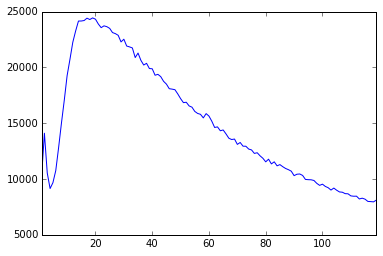

In [25]:
table = train.d_AB[(train.d_AB < 120) & (train.d_AB > 0)]
table = table.value_counts().sort_index()
table.plot()

Random

In [36]:
%%time
N_RANDOM = 3
with open(dataFolder + 'randomSubmission.csv', 'w') as f:
    candidates = np.random.choice(N_USERS, (N_USERS, N_RANDOM))
    for i in range(candidates.shape[0]):
        s = ','.join([str(x) for x in [i] + list(np.unique(candidates[i]))]) + '\n'
        f.write(s)

CPU times: user 34.1 s, sys: 199 ms, total: 34.3 s
Wall time: 34.3 s


Benchmark

In [38]:
train.columns

Index([u'A', u'B', u'x_A', u'x_B', u'c_AB', u'd_AB', u'c_BA', u'd_BA', u's_AB',
       u's_BA'],
      dtype='object')

In [37]:
next(train.itertuples())

(0, 941235, 666804, 0, 1, 1, 20, 1, 22, 0, 0)

In [39]:
%%time

THRESHOLD = 25
users = {}
edges = {}
for row in train.itertuples():
    users[row[1]] = row[3]
    users[row[2]] = row[4]
    if row[5] + row[7] < THRESHOLD:
        continue
    if row[1] not in edges:
        edges[row[1]] = set()
    edges[row[1]].add(row[2])
    if row[2] not in edges:
        edges[row[2]] = set()
    edges[row[2]].add(row[1])

CPU times: user 12.4 s, sys: 468 ms, total: 12.8 s
Wall time: 12.6 s


In [40]:
%%time
with open(dataFolder + 'submission.csv', 'w') as f:
    for i in range(N_USERS):
        candidates = set([candidate
                          for g in edges.get(i, set())
                          for candidate in edges.get(g, set())]) - edges.get(i, set()) - set([i])
        if users.get(i, 0) != 0:
            candidates = set([x for x in candidates if users[x] == 0])
        f.write(','.join([str(x) for x in [i] + list(candidates)]) + '\n')

CPU times: user 12.7 s, sys: 110 ms, total: 12.8 s
Wall time: 12.8 s
